# Import Libs

In [2]:
pip install -U scikit-learn==0.23

  Using cached scikit_learn-0.23.0-cp38-cp38-manylinux1_x86_64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install pandas_profiling
import sklearn
sklearn.__version__

'0.23.0'

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#import pandas_profiling as pdp

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgbm
#import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Data loading and overview

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_53ebe756cad443f3b91684cd45c8e830 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wfzSUNnmMx3Y-eve_qc_rAPCQIXhIkpRUM_I75siwPH6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_53ebe756cad443f3b91684cd45c8e830.get_object(Bucket='heartstrokeprediction-donotdelete-pr-8le368jxk4qprq',Key='healthcare-dataset-stroke-data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# EDA

## BOXPLOT

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

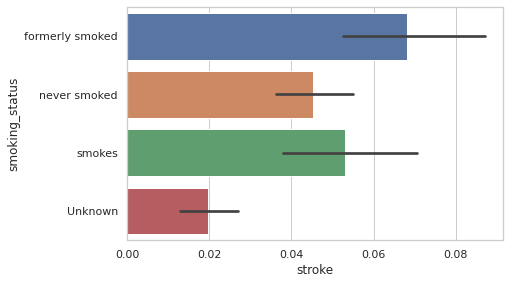

In [10]:
sns.barplot(x = 'stroke', y = 'smoking_status', data = df)

'Unknown' and 'never smoker' has a low percentage of strokes in the sample. Let's combine them into one group: 'never smoker'.

In [11]:
replace_values = {'Unknown': 'never smoked'}

df = df.replace({'smoking_status': replace_values})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<AxesSubplot:xlabel='smoking_status', ylabel='age'>

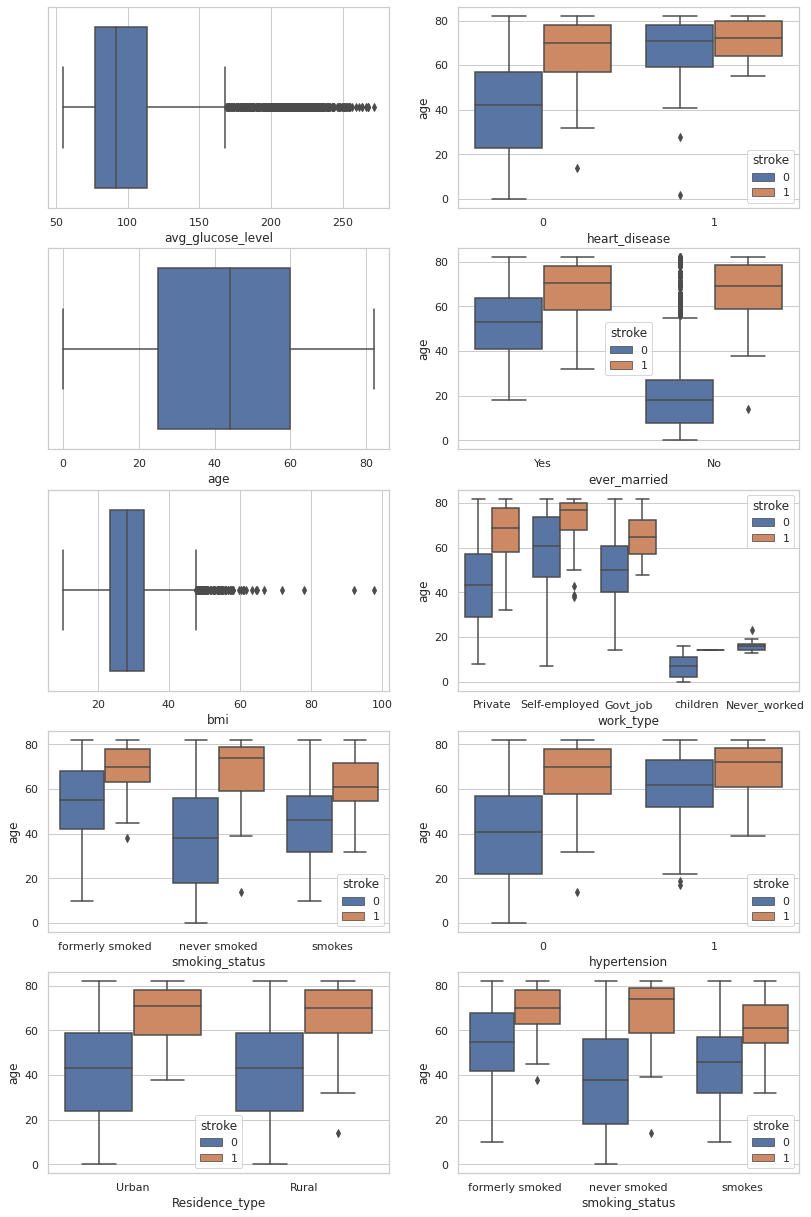

In [12]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes[0][0])
sns.boxplot(x = 'age', data = df, ax=axes[1][0])
sns.boxplot(x = 'bmi', data = df, ax=axes[2][0])
sns.boxplot(x = 'smoking_status', y = 'age', hue = 'stroke', data = df, ax=axes[3][0])
sns.boxplot(x = 'hypertension',y = 'age', hue = 'stroke', data = df, ax=axes[3][1])
sns.boxplot(x = 'heart_disease', y= 'age', hue = 'stroke', data = df, ax=axes[0][1])
sns.boxplot(x = 'ever_married',y = 'age', hue = 'stroke', data = df, ax = axes[1][1])
sns.boxplot(x = 'work_type',y = 'age',hue = 'stroke', data = df, ax = axes[2][1])
sns.boxplot(x = 'Residence_type',y = 'age',hue = 'stroke', data = df, ax = axes[4][0])
sns.boxplot(x = 'smoking_status',y = 'age', hue = 'stroke', data = df, ax = axes[4][1])

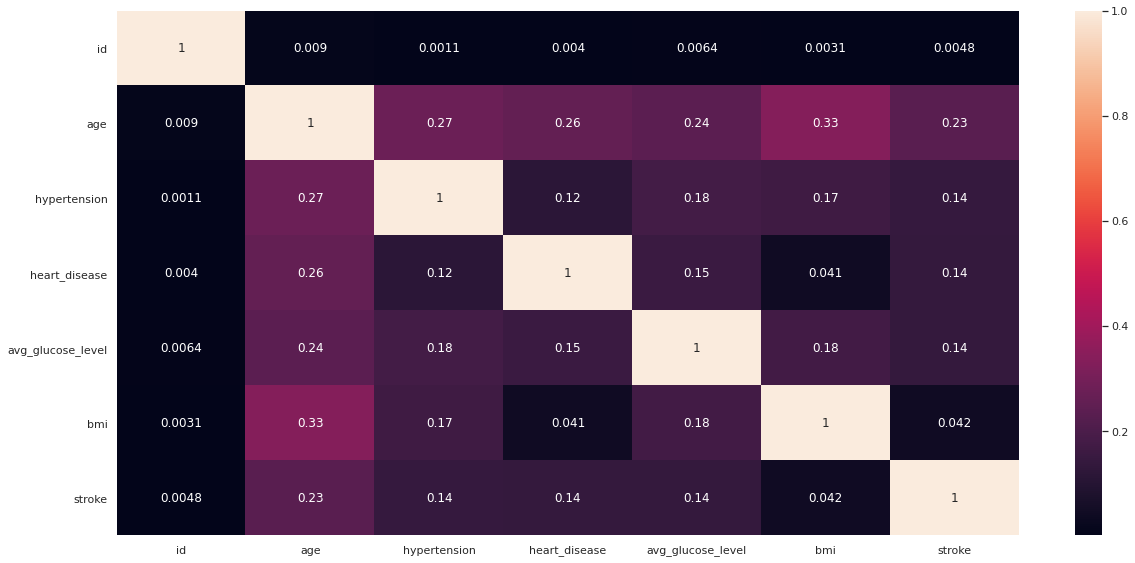

In [13]:
#Now, we will show the correlation between the parameters with a heatmap:
plt.figure(figsize = (18, 9))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Good insights :)

We have oultiers in avg_glucose_level and bmi.

### Remove outliers

In [15]:
def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [16]:
df['bmi'] = remove_outliers(df['bmi'])
df['avg_glucose_level'] = remove_outliers(df['avg_glucose_level'])
print('Outliers successfully removed')

Outliers successfully removed


<AxesSubplot:xlabel='avg_glucose_level'>

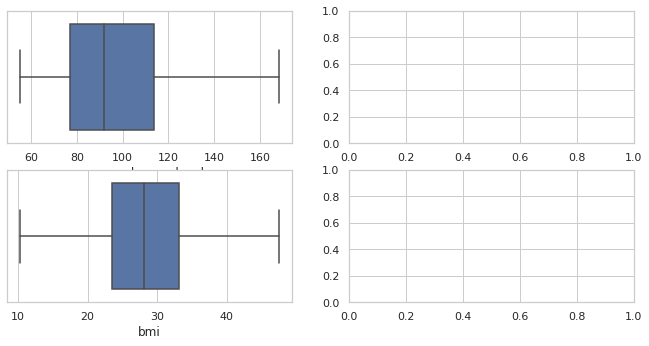

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.boxplot(x = 'bmi', data = df, ax=axes[1][0])
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes[0][0])

In [18]:
df = df.drop('id', axis = 1)

In [19]:
df.shape

(4909, 11)

# Preprocessing

In [20]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes']


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['gender'] = le.fit_transform(df['gender'])
df['work_type'] = le.fit_transform(df['work_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [22]:
df.shape

(4909, 11)

In [23]:
df.iloc[0,:]

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           1.00
work_type              2.00
Residence_type         1.00
avg_glucose_level    168.32
bmi                   36.60
smoking_status         0.00
stroke                 1.00
Name: 0, dtype: float64

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,168.32,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,168.32,34.4,2,1
4,0,79.0,1,0,1,3,0,168.32,24.0,1,1
5,1,81.0,0,0,1,2,1,168.32,29.0,0,1


In [25]:
X = df.iloc[:,0:10].values
y = df.iloc[:,10].values

In [26]:
X.shape

(4909, 10)

In [27]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a = one.fit_transform(X[:,0:1]).toarray()
b = one.fit_transform(X[:,5:6]).toarray()
c = one.fit_transform(X[:,9:10]).toarray()

In [28]:
a

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
b

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [30]:
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [31]:
X = np.delete(X,[0,5,9],axis = 1)
X

array([[ 67.  ,   0.  ,   1.  , ...,   1.  , 168.32,  36.6 ],
       [ 80.  ,   0.  ,   1.  , ...,   0.  , 105.92,  32.5 ],
       [ 49.  ,   0.  ,   0.  , ...,   1.  , 168.32,  34.4 ],
       ...,
       [ 35.  ,   0.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [ 51.  ,   0.  ,   0.  , ...,   0.  , 166.29,  25.6 ],
       [ 44.  ,   0.  ,   0.  , ...,   1.  ,  85.28,  26.2 ]])

In [32]:
X.shape

(4909, 7)

In [33]:
X = np.concatenate((c,X),axis = 1)
X.shape

(4909, 10)

In [34]:
X = np.concatenate((b,X),axis = 1)
X.shape

(4909, 15)

In [35]:
X = np.concatenate((a,X),axis = 1)
X.shape

(4909, 18)

In [36]:
X[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,   1.  ,
       168.32,  36.6 ])

In [37]:
X

array([[  0.  ,   1.  ,   0.  , ...,   1.  , 168.32,  36.6 ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 105.92,  32.5 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  , 168.32,  34.4 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,  85.28,  26.2 ]])

# Model

In [38]:
X.shape

(4909, 18)

In [39]:
y.shape

(4909,)

### We use sampling because there is an imbalance of the target feature

<AxesSubplot:ylabel='count'>

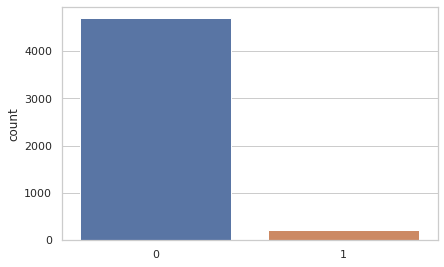

In [40]:
### before oversampling
sns.countplot(y)

In [40]:
#!pip install imblearn

In [41]:
'''from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))'''

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 4700 

After OverSampling, the shape of train_X: (9400, 18)
After OverSampling, the shape of train_y: (9400,) 

After OverSampling, counts of label '1': 4700
After OverSampling, counts of label '0': 4700


In [41]:
### after oversampling

sns.countplot(y_res)

NameError: name 'y_res' is not defined

Oversampling is successful

# Modeling

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print('***Decision Tree Model Results***')
print(confusion_matrix(dtc_pred, y_test))
print(classification_report(dtc_pred, y_test))

***Decision Tree Model Results***
[[869  43]
 [ 53 915]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       912
           1       0.96      0.95      0.95       968

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



## Random Forest

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('** Random Forest**')
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

** Random Forest**
[[911  42]
 [ 11 916]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       953
           1       0.96      0.99      0.97       927

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



### It's best F1 score

## Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(lr_pred, y_test))
print('** Logistic Regression**')
print(classification_report(lr_pred, y_test))

[[695 171]
 [227 787]]
** Logistic Regression**
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       866
           1       0.82      0.78      0.80      1014

    accuracy                           0.79      1880
   macro avg       0.79      0.79      0.79      1880
weighted avg       0.79      0.79      0.79      1880



## SVC

In [47]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print('**Support vector classifier**')
print(confusion_matrix(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

**Support vector classifier**
[[637 147]
 [285 811]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       784
           1       0.85      0.74      0.79      1096

    accuracy                           0.77      1880
   macro avg       0.77      0.78      0.77      1880
weighted avg       0.78      0.77      0.77      1880



## KNN

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('**K-Nearest Neighbours**')
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

**K-Nearest Neighbours**
[[746   8]
 [176 950]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       754
           1       0.99      0.84      0.91      1126

    accuracy                           0.90      1880
   macro avg       0.90      0.92      0.90      1880
weighted avg       0.92      0.90      0.90      1880



# Grid Search

In [49]:
cross_valid_scores = {}

## Decision Tree

In [50]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}
model_dtc = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)
model_dtc = GridSearchCV(
    model_dtc, 
    parameters, 
    cv=5,
)
model_dtc.fit(X_train, y_train)
model_dtc_pred = model_dtc.predict(X_test)
print('** Applying Grid Search to Decision tree**')
print(classification_report(model_dtc_pred, y_test))

print(f'Best parameters {model_dtc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_dtc.best_score_
print('-----')


** Applying Grid Search to Decision tree**
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       912
           1       0.95      0.94      0.95       968

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Best parameters {'max_depth': 13}
Mean cross-validated accuracy score of the best_estimator: 0.943
-----
CPU times: user 633 ms, sys: 3.42 ms, total: 637 ms
Wall time: 635 ms


## Random Forest

In [51]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}
model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)
model_rf = GridSearchCV(
    model_rf, 
    parameters, 
    cv=5,
)
model_rf.fit(X_train, y_train)
model_rf_pred = model_rf.predict(X_test)
print('** Applying Grid Search to Random Forest**')
print(classification_report(model_rf_pred, y_test))
print(f'Best parameters {model_rf.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_rf.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_rf.best_score_

** Applying Grid Search to Random Forest**
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       956
           1       0.95      0.99      0.97       924

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880

Best parameters {'max_depth': 13, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.972
CPU times: user 10.8 s, sys: 37.8 ms, total: 10.9 s
Wall time: 10.9 s


In [52]:
import joblib
joblib.dump(model_rf,"model")

['model']

In [53]:
y_pred = model_rf.predict([[0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,   1.  ,
       168.32,  36.6 ]])

In [54]:
y_pred

array([1])

In [55]:
!pip install ibm_watson_machine_learning

In [56]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
          "url" : "https://us-south.ml.cloud.ibm.com",
          "apikey": "Z3uWFvZLMkCxrP7McP2otDti2HgOYk-CoiQ1YbhqbIwi"
}


In [70]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
128ac92f-7875-4cb9-b392-202482b46483  heart_stroke_deploy  2022-03-05T06:18:45.249Z
------------------------------------  -------------------  ------------------------


In [71]:
SPACE_ID="128ac92f-7875-4cb9-b392-202482b46483"

In [72]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [73]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [61]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [74]:
MODEL_NAME = 'strokemodel'
DEPLOYMENT_NAME = 'stroke_deploy_3.8'
Life_MODEL = model_rf

In [84]:
import sklearn
sklearn.__version__

'1.0.2'

In [75]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [76]:
#Save model
model_details = wml_client.repository.store_model(
    model=Life_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [77]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 'f15'

In [78]:
model_uid = wml_client.repository.get_model_id(model_details)

In [79]:
model_uid

'c796241f-a5a7-4257-8d40-ed9be6419d3f'

In [80]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [81]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [82]:
# Deploy
deployment1 = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'c796241f-a5a7-4257-8d40-ed9be6419d3f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b2cd1ba2-9cd8-4192-9491-9a8d21eed0c9'
------------------------------------------------------------------------------------------------




In [83]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "Z3uWFvZLMkCxrP7McP2otDti2HgOYk-CoiQ1YbhqbIwi"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": [["g1","g2","g3","wt1","wt2","wt3","wt4","wt5","sm1","sm2","sm3","age","q","hd","em","rt","agl","bmi"]], "values": [[0,1,0,0,0,1,0,0,1,0,0,67,0,1,1,1,168.32,36.6]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b2cd1ba2-9cd8-4192-9491-9a8d21eed0c9/predictions?version=2022-03-05', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'trace': '12e395159ecc0ec9d5cf1c6a85e5ba87', 'errors': [{'code': 'score_processing_failure', 'message': "'DecisionTreeClassifier' object has no attribute 'n_features_'"}], 'status_code': 400}
